In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./dataset"))

# Any results you write to the current directory are saved as output.

['sms-spam-collection-dataset.zip', 'spam.csv']


In [8]:
#load data in dataframe
df = pd.read_csv("./dataset/spam.csv", encoding='latin-1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1, inplace=True)
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.rename(columns={'v1':'label','v2':'text'},inplace=True)
df.head(5)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.label.value_counts()
#df.info()

ham     4825
spam     747
Name: label, dtype: int64

Text(0.5, 1.0, 'Number of spam or ham messages')

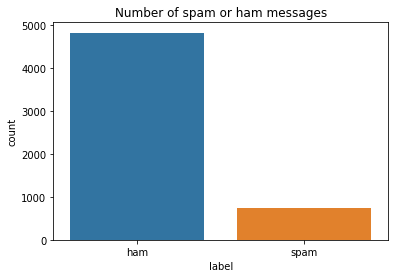

In [12]:
sns.countplot(df.label)
plt.xlabel("label")
plt.title("Number of spam or ham messages")

In [13]:
df["label_as_num"] = df.label.map({"ham":0, "spam":1})

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

y = df['label']
x = df['text']
cv = CountVectorizer()
x = cv.fit_transform(x)





In [16]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
#Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1453
        spam       0.92      0.92      0.92       219

   micro avg       0.98      0.98      0.98      1672
   macro avg       0.95      0.95      0.95      1672
weighted avg       0.98      0.98      0.98      1672



In [18]:
inp = "you win a plane ticket to dubai. contact urgent"#"we got password reset request from your id. click here to reset, if not you please ignore."#"you win a lottery. please click here to claim prize money."
inp1 = [inp]
inp1 = cv.transform(inp1).toarray()
clf.predict(inp1)

array(['spam'], dtype='<U4')